In [ ]:
import numpy as np
from numpy import genfromtxt
import matplotlib.pyplot as plt

In [ ]:
# dataset
data = genfromtxt('Advertising.csv', delimiter=',', skip_header=1)
N = data.shape[0]
X = data[:,1:4]
y = data[:,4:]

# Normalize input data by using mean normalizaton
def mean_normalization(X):
  N = len(X)
  maxi = np.max(X)
  mini = np.min(X)
  avg = np.mean(X)
  X = (X-avg) / (maxi-mini)
  X_b = np.c_[np.ones((N, 1)), X]
  return X_b, maxi, mini, avg

In [ ]:
def batch_gradient_descent(X_b, y, n_epochs=100, learning_rate=0.01):

    # thetas = np.random.randn(4, 1) # uncomment this line for real application
    thetas = np.asarray([[1.16270837], [-0.81960489],  [1.39501033],  [0.29763545]])

    thetas_path = [thetas]
    losses = []

    for i in range(n_epochs):
        # tính output
        output = X_b.dot(thetas)

        # tính loss
        loss = (output - y)**2

        # tính đạo hàm cho loss
        loss_grd = 2*(output - y)/N

        # tính đạo hàm cho các tham số
        gradients = X_b.T.dot(loss_grd)

        # cập nhật tham số
        thetas = thetas - learning_rate*gradients
        thetas_path.append(thetas)

        mean_loss = np.sum(loss)/N
        losses.append(mean_loss)

    return thetas_path, losses




In [ ]:
def computeRMSError(theta, x_test, y_test):
  predict_y = x_test.dot(theta)
  rms = np.sum((y_test - predict_y)**2) / len(x_test)
  return np.sqrt(rms)


In [ ]:
from sklearn.model_selection import train_test_split


X_b, maxi, mini, avg = mean_normalization(X)

X_train, X_test, y_train, y_test = train_test_split(X_b, y, test_size=0.2, random_state=42)

k = 5
step_fold = int(X_train.shape[0] /k)

x_fold1 = X_train[:step_fold,:]
y_fold1 = y_train[:step_fold]

x_fold2 = X_train[step_fold:2*step_fold,:]
y_fold2 = y_train[step_fold:2*step_fold]

x_fold3 = X_train[2*step_fold:3*step_fold,:]
y_fold3 = y_train[2*step_fold:3*step_fold]

x_fold4 = X_train[3*step_fold:4*step_fold:,:]
y_fold4 = y_train[3*step_fold:4*step_fold]

x_fold5 = X_train[4*step_fold:,:]
y_fold5 = y_train[4*step_fold:]

#Cross validation 1
cr_x_train_1 = np.r_[x_fold1, x_fold2, x_fold3, x_fold4]
cr_y_train_1 = np.r_[y_fold1, y_fold2, y_fold3, y_fold4]
cr_x_test_1 = x_fold5
cr_y_test_1 = y_fold5
bgd_thetas_1, losses_1 = batch_gradient_descent(cr_x_train_1, cr_y_train_1, n_epochs=1000, learning_rate=0.01)
rms_1 = computeRMSError(bgd_thetas_1[-1], cr_x_test_1, cr_y_test_1)
print("RMS for cross validation 1:", rms_1)


#Cross validation 2
cr_x_train_2 = np.r_[x_fold1, x_fold2, x_fold3, x_fold5]
cr_y_train_2 = np.r_[y_fold1, y_fold2, y_fold3, y_fold5]
cr_x_test_2 = x_fold4
cr_y_test_2 = y_fold4
bgd_thetas_2, losses_2 = batch_gradient_descent(cr_x_train_2, cr_y_train_2, n_epochs=1000, learning_rate=0.01)
rms_2 = computeRMSError(bgd_thetas_2[-1], cr_x_test_2, cr_y_test_2)
print("RMS for cross validation 2:", rms_2)

#Cross validation 3
cr_x_train_3 = np.r_[x_fold1, x_fold2, x_fold4, x_fold5]
cr_y_train_3 = np.r_[y_fold1, y_fold2, y_fold4, y_fold5]
cr_x_test_3 = x_fold3
cr_y_test_3 = y_fold3
bgd_thetas_3, losses_3 = batch_gradient_descent(cr_x_train_3, cr_y_train_3, n_epochs=1000, learning_rate=0.01)
rms_3 = computeRMSError(bgd_thetas_3[-1], cr_x_test_3, cr_y_test_3)
print("RMS for cross validation 3:", rms_3)


#Cross validation 4
cr_x_train_4 = np.r_[x_fold1, x_fold3, x_fold4, x_fold5]
cr_y_train_4 = np.r_[y_fold1, y_fold3, y_fold4, y_fold5]
cr_x_test_4 = x_fold2
cr_y_test_4 = y_fold2
bgd_thetas_4, losses_4 = batch_gradient_descent(cr_x_train_4, cr_y_train_4, n_epochs=1000, learning_rate=0.01)
rms_4 = computeRMSError(bgd_thetas_4[-1], cr_x_test_4, cr_y_test_4)
print("RMS for cross validation 4:", rms_4)

#Cross validation 5
cr_x_train_5 = np.r_[x_fold2, x_fold3, x_fold4, x_fold5]
cr_y_train_5 = np.r_[y_fold2, y_fold3, y_fold4, y_fold5]
cr_x_test_5 = x_fold1
cr_y_test_5 = y_fold1
bgd_thetas_5, losses_5 = batch_gradient_descent(cr_x_train_5, cr_y_train_5, n_epochs=1000, learning_rate=0.01)

rms_5 = computeRMSError(bgd_thetas_5[-1], cr_x_test_5, cr_y_test_5)
print("RMS for cross validation 5:", rms_5)

#Select the best cross-valididation model for final evluation on test set
rms_test = computeRMSError(bgd_thetas_2[-1], X_test, y_test)
print("test rms", rms_test)





RMS for cross validation 1: 2.881847714063822
RMS for cross validation 2: 2.6710408305524775
RMS for cross validation 3: 2.7881616965245204
RMS for cross validation 4: 2.505887662603752
RMS for cross validation 5: 2.721299483835143
test rms 2.9133471785274003


In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

kf = KFold(n_splits=5)
for i, (train_index, test_index) in enumerate(kf.split(X_train,y_train)):
  print(f"Fold {i}:")
  print(f"  X Train: index={X_train[train_index].shape}")
  print(f"  Y Train: index={y_train[train_index].shape}")

  print(f"  X Test: index={X_train[test_index].shape}")
  print(f"  Y Test: index={y_train[test_index].shape}")

  bgd_thetas, losses = batch_gradient_descent(X_train[train_index], y_train[train_index], n_epochs=1000, learning_rate=0.01)
  rms = computeRMSError(bgd_thetas[-1], X_train[test_index], y_train[test_index])
  print("Rms = ", rms)


Fold 0:
  X Train: index=(128, 4)
  Y Train: index=(128, 1)
  X Test: index=(32, 4)
  Y Test: index=(32, 1)
Rms =  2.721299483835143
Fold 1:
  X Train: index=(128, 4)
  Y Train: index=(128, 1)
  X Test: index=(32, 4)
  Y Test: index=(32, 1)
Rms =  2.505887662603752
Fold 2:
  X Train: index=(128, 4)
  Y Train: index=(128, 1)
  X Test: index=(32, 4)
  Y Test: index=(32, 1)
Rms =  2.7881616965245204
Fold 3:
  X Train: index=(128, 4)
  Y Train: index=(128, 1)
  X Test: index=(32, 4)
  Y Test: index=(32, 1)
Rms =  2.6710408305524775
Fold 4:
  X Train: index=(128, 4)
  Y Train: index=(128, 1)
  X Test: index=(32, 4)
  Y Test: index=(32, 1)
Rms =  2.881847714063822


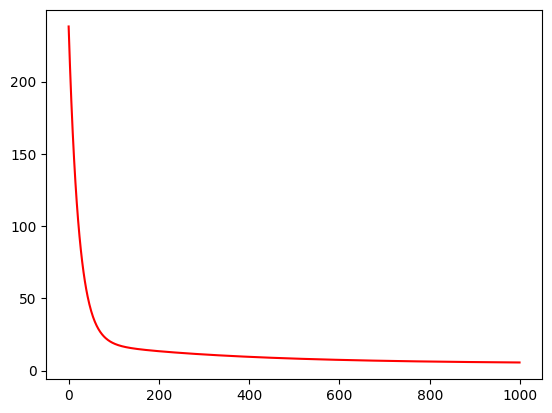

In [ ]:
X_b, maxi, mini, avg = mean_normalization(X)
bgd_thetas, losses = batch_gradient_descent(X_b, y, n_epochs=1000, learning_rate=0.01)

# in loss cho 100 sample đầu
x_axis = list(range(1000))
plt.plot(x_axis,losses[:1000], color="r")
plt.show()